In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [84]:
def sort_pair_ascending_xs(xs, ys):
    li = []
    for x, y in zip(xs, ys):
        li.append((x, y))
    
    li = sorted(li, key=lambda x: x[0])
    
    ret_xs = []
    ret_ys = []
    for x, y in li:
        ret_xs.append(x)
        ret_ys.append(y)
        
    return ret_xs, ret_ys

In [125]:
def draw_scatter(h, a, n, s, title, xlabel, ylabel):
    happy_x, happy_y = sort_pair_ascending_xs(h[0], h[1])
    angry_x, angry_y = sort_pair_ascending_xs(a[0], a[1])
    neutral_x, neutral_y = sort_pair_ascending_xs(n[0], n[1])
    sad_x, sad_y = sort_pair_ascending_xs(s[0], s[1])

    fig, ax = plt.subplots()
    scale = 30
    
    ax.set_title(title, y=-0.4)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    ax.scatter(happy_x, happy_y, c='green', s=scale, label='Happy', alpha=0.6, edgecolors='none')
    ax.scatter(angry_x, angry_y, c='red', s=scale, label='Angry', alpha=0.6, edgecolors='none')
    ax.scatter(neutral_x, neutral_y, c='yellow', s=scale, label='Neutral', alpha=0.6, edgecolors='none')
    ax.scatter(sad_x, sad_y, c='blue', s=scale, label='Sad', alpha=0.6, edgecolors='none')
    ax.legend()
    ax.grid(True)

    plt.show()

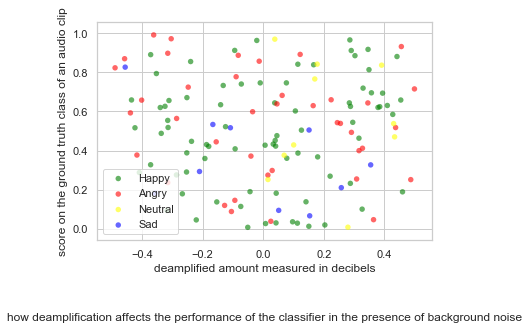

In [127]:
happy_x = np.random.rand(80) - 0.5
happy_y = np.random.rand(80)
h = [happy_x, happy_y]

angry_x = np.random.rand(40) - 0.5
angry_y = np.random.rand(40)
a = [angry_x, angry_y]

neutral_x = np.random.rand(10) - 0.5
neutral_y = np.random.rand(10)
n = [neutral_x, neutral_y]

sad_x = np.random.rand(10) - 0.5
sad_y = np.random.rand(10)
s = [sad_x, sad_y]

title = 'how deamplification affects the performance of the classifier in the presence of background noise'
xlabel = 'deamplified amount measured in decibels'
ylabel = 'score on the ground truth class of an audio clip'
draw_scatter(h, a, n, s, title, xlabel, ylabel)

In [55]:
category_names = ['error rate', 'accuracy']
results = {'Happy': [0.0030, 0.9970], 'Angry': [0.0031, 0.9969], 'Neutral': [0.0, 1.0], 'Sad': [0.0, 1.0]
           }
graph_title = 'my_graph_title'

In [121]:
def draw(results, category_names, graph_title):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.set_title(graph_title, y=-0.1)
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'black' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            if c < 0.01:
                continue
            ax.text(x, y, str(float(c))[:5], ha='center',
                    va='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax

(<Figure size 662.4x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1038c9f98>)

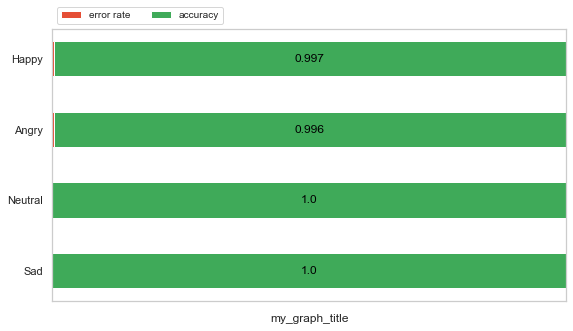

In [122]:
draw(results, category_names, graph_title)